In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkcalendar import DateEntry
import yfinance as yf
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [12]:
def RSIcalc(asset, start, end, ma1):
    try:
        df = yf.download(asset, start=start, end=end)
    except:
        exception += "Make sure to input a valid ticker symbol./n Make sure Start date is before End Date./n"

    delta = df['Adj Close'].diff(1)
    delta.dropna(inplace=True)

    positive = delta.copy()
    negative = delta.copy()

    positive[positive < 0] = 0
    negative[negative > 0] = 0

    average_gain = positive.rolling(window=ma1).mean()
    average_loss = negative.rolling(window=ma1).mean()

    relative_strength = average_gain / average_loss
    RSI = 100 - (100 / (1 + relative_strength))

    df['RSI'] = RSI

    df.loc[(df['RSI'] < 30), 'Buy'] = "Yes"
    df.loc[(df['RSI'] > 30), 'Buy'] = "Sell"

    return df
"""
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()

    df["Upmove"] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()

    df = df.dropna()

    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = "Yes"
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = "No"
    """
    

'\n    df[\'MA200\'] = df[\'Adj Close\'].rolling(window=200).mean()\n    df[\'price change\'] = df[\'Adj Close\'].pct_change()\n\n    df["Upmove"] = df[\'price change\'].apply(lambda x: x if x > 0 else 0)\n    df[\'Downmove\'] = df[\'price change\'].apply(lambda x: abs(x) if x < 0 else 0)\n\n    df[\'avg Up\'] = df[\'Upmove\'].ewm(span=19).mean()\n    df[\'avg Down\'] = df[\'Downmove\'].ewm(span=19).mean()\n\n    df = df.dropna()\n\n    df[\'RS\'] = df[\'avg Up\'] / df[\'avg Down\']\n    df[\'RSI\'] = df[\'RS\'].apply(lambda x: 100-(100/(x+1)))\n    df.loc[(df[\'Adj Close\'] > df[\'MA200\']) & (df[\'RSI\'] < 30), \'Buy\'] = "Yes"\n    df.loc[(df[\'Adj Close\'] < df[\'MA200\']) | (df[\'RSI\'] > 30), \'Buy\'] = "No"\n    '

In [13]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []

    for i in range(len(df)):
        if df["Buy"].iloc[i] == "Yes": 
            Buying_dates.append(df.iloc[i].name)
        elif df["Buy"].iloc[i] == "Sell":
            Selling_dates.append(df.iloc[i].name)
    return Buying_dates, Selling_dates

In [14]:
security = "TSLA"
startDate = "2019-01-01"
endDate = "2021-12-31"
ma1 = 12
ma2 = 20

In [15]:
data = RSIcalc(security, startDate, endDate, ma1)
buy, sell = getSignals(data)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI,Buy
Date,,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,NaN,NaN
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,NaN,NaN
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,NaN,NaN
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,NaN,NaN
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,1446.759320,Sell
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,922.178282,Sell
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,272.068030,Sell


ValueError: x and y must be the same size

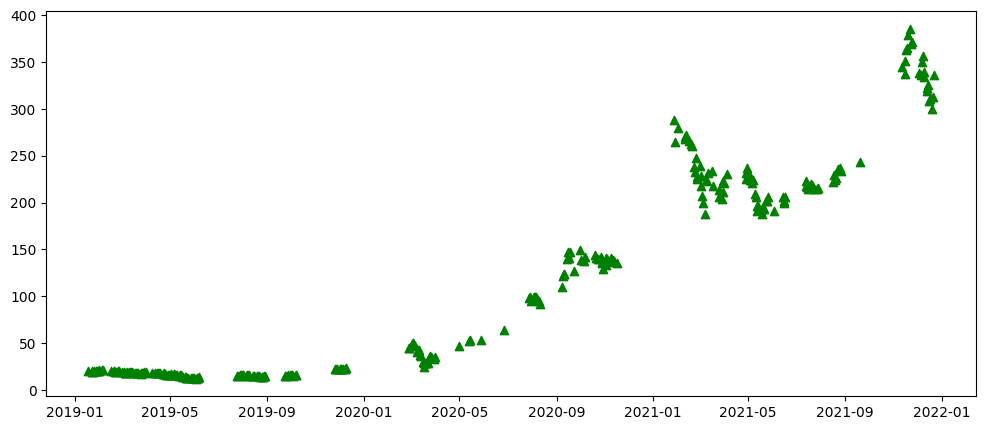

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(data.loc[buy].index, data.loc[buy]['Adj Close'], marker = '^', c='g')
plt.scatter(data.loc[sell].index, data.loc[buy]['Adj Close'], marker = 'v', c='r')
plt.plot(data['Adj Close'], alpha=.07)